In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from math import sqrt
import time 
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook
from scipy import signal
import math
import scipy.optimize as optimize
import scipy.io as sio
import scipy.signal as signal
import itertools
from scipy.fftpack import fft, ifft
plt.style.use('seaborn')
import pickle
from scipy import stats
from zebra_chord import *
from collect_statistics import *
from visualization import *
from mpl_toolkits.mplot3d import Axes3D
import scipy
import pywt
import os 

In [2]:
dic = return_default_dic()
dic["v_0"] = .26
dic["dt"] = 0.5
dic["n_t"]  = 200
dic["n_c"] = 100
dic["delay"] = 14
dic["c"] = 20
dic["tau_w"] = 1.
dic["gamma1"] = 21
dic["tau_c"] = 0
dic["tau_2"] = 20
dic["beta"] = 0.1
dic["n"] = 4
dic["m"] = 5
dic["K_u"] = 0.3
dic["loc"] = 40
dic["sigma_1"] = 0.026 ## std deviation of the white noise added
dic["sigma_2"] = 0.026 ## std deviation of the white noise added

dic["u_0"] = .5
dic["dx"] = .5


In [200]:
noise_u  = np.linspace(0, 1, 10)
noise_w  = np.linspace(0, 1, 10)

In [20]:
noise_pairs = []
np_index = []
for i, nu in enumerate(noise_u):
    for j, nw in enumerate(noise_w):
        noise_pairs.append((nu, nw))
        np_index.append((i, j))

In [21]:
len(noise_pairs)

100

In [22]:
realizations = 10
r_list_ = []


In [23]:
for i, n in enumerate(noise_pairs):
    tik = time.time()
    print (f"Started for {i} th value")
    
    r_realizations = []
    for j in range(realizations):
        dic["delay"] = 14
        dic["sigma_1"] = n[0]
        dic["sigma_2"] = n[1]
        dic["tau_d"] = round(dic["delay"]/dic["dt"])
        u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
        r_realizations.append(r)
        
    r_list_.append([r_realizations, (n)])
    if (i%5 == 0):
        pickle.dump(r_list_, open(f"data_realizations_noise_pairs_smaller{i}.pkl", "wb"))
        r_list_ = []
    tok = time.time()
    print (f"Finished for {i} th value", tok-tik)

Started for 0 th value
Finished for 0 th value 42.73466396331787
Started for 1 th value
Finished for 1 th value 40.51984906196594
Started for 2 th value
Finished for 2 th value 40.05549192428589
Started for 3 th value
Finished for 3 th value 39.812578201293945
Started for 4 th value
Finished for 4 th value 39.97158980369568
Started for 5 th value
Finished for 5 th value 40.888025999069214
Started for 6 th value
Finished for 6 th value 39.96393799781799
Started for 7 th value
Finished for 7 th value 39.92001509666443
Started for 8 th value
Finished for 8 th value 40.41139817237854
Started for 9 th value
Finished for 9 th value 41.312257051467896
Started for 10 th value
Finished for 10 th value 40.11776781082153
Started for 11 th value
Finished for 11 th value 40.22629404067993
Started for 12 th value
Finished for 12 th value 40.343302965164185
Started for 13 th value
Finished for 13 th value 40.123501777648926
Started for 14 th value
Finished for 14 th value 40.329291105270386
Started f

In [193]:
def extract_flattened_list(stats):
    lis = []
    for aa in stats:
        lis.append(list(aa))
    lis_f = [item for sublist in lis for item in sublist]
    return lis_f

def extract_flattened_list_i(stats):
    lis = []
    for aa in stats:
        lis.append(list(aa))
    lis_f = [item for sublist in lis for item in sublist]
    return lis_f

def extract_mean_noise(stats):
    lis = []
    for aa in stats[0]:
        lis.append(list(aa))
    lis_f = [item for sublist in lis for item in sublist]
    mu = np.mean(lis_f)
    np_index  = stats[1]
    return mu, np_index


def return_flattened_somite_stats_(r_list):
    """
    
    no of realizations is 30 for each r_list
    
    """
    som_stat = []
    for r in (r_list):       
        somite_stat = extract_somite_statistics_from_readout(r, dic["dx"])[2]
        som_stat.append((somite_stat))
    return som_stat

def return_flattened_somite_stats_smooth(r_list):
    """
    
    no of realizations is 30 for each r_list
    
    """
    som_stat = []
    for r in (r_list):       
        somite_stat = extract_somite_statistics_from_readout(smooth(r), dic["dx"])[2]
        som_stat.append((somite_stat))
    return som_stat

def calculate_best_fit(data):
    
    dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


    sse_best = 100000000
    best_param = None
    best_dist = None
    
    y, x = np.histogram(data, bins="auto", density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    for dist_name in dist_names:

        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)
        arg = param[:-2]
        loc = param[-2]
        scale = param[-1]

        # Calculate fitted PDF and error with fit in distribution
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))
        if (sse < sse_best):
            sse_best = sse
            best_param = param
            best_dist = dist_name

    return best_dist, best_param, sse_best


def calculate_best_fit(data):
    
    dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


    sse_best = 100000000
    best_param = None
    best_dist = None
    
    y, x = np.histogram(data, bins="auto", density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    for dist_name in dist_names:

        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)
        arg = param[:-2]
        loc = param[-2]
        scale = param[-1]

        # Calculate fitted PDF and error with fit in distribution
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))
        if (sse < sse_best):
            sse_best = sse
            best_param = param
            best_dist = dist_name

    return best_dist, best_param, sse_best

def calculate_best_fit_aic(data):
    
    dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull','expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


    aic_best = 100000000
    best_param = None
    best_dist = None
    
    y, x = np.histogram(data, bins="auto", density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    for dist_name in dist_names:

        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)
        arg = param[:-2]
        loc = param[-2]
        scale = param[-1]
        
        # Calculate fitted PDF and error with fit in distribution
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        logLik = np.sum( dist.logpdf(data, loc=loc, scale=scale, *arg) ) 

        k = len(param)
        aic = 2*k - 2*(logLik)
        if (aic < aic_best):
            aic_best = aic
            best_param = param
            best_dist = dist_name

    return best_dist, best_param, aic_best

In [194]:
somites_noise_list = []

In [195]:
for i, n in enumerate(noise_pairs):
    tik = time.time()
    #print (f"Started for {i} th value")
    
    r_realizations = []
    if (i%5 == 0):
        r_list_ = pickle.load(open(f"data_realizations_noise_pairs_smaller{i}.pkl", "rb"))
    
    if (len(r_list_) == 1):
        sl = return_flattened_somite_stats_(r_list_[0][0])
        somites_noise_list.append( ( extract_flattened_list_i(sl), r_list_[0][1] ) )
    else:
        for rr in r_list_:
            
            # if smoothed somite size greater then keep that else keep old one 
            rr_c = copy.deepcopy(rr[0])
            
            somites_list_smooth = return_flattened_somite_stats_smooth(rr_c)
            sl_s = extract_flattened_list(somites_list_smooth)    
            
            
            somites_list = return_flattened_somite_stats_(rr[0])
            sl = extract_flattened_list(somites_list)    
            #print (rr[1], np.average(sl), np.average(sl_s))

            if (np.average(sl_s) > np.average(sl)):
                somites_noise_list.append( (sl_s, rr[1]) )
            else:
                somites_noise_list.append( (sl, rr[1]) )
                
            #plt.plot(x,rr[0][1])
            #plt.show()
    #break 
    tok = time.time()
    #print (f"Finished for {i} th value", tok-tik)

In [196]:
dic_n = {}
n_u, n_w = [], []
snl_av = []
mat = np.zeros((10, 10))
mat_string = np.empty((10, 10), dtype=np.object)


In [197]:
for snl in somites_noise_list:
    n1, n2 = snl[1]
    n_u.append(n1)
    n_w.append(n2)
    snl_av.append(np.average(snl[0]))
    

In [198]:
for nu, nw, savg in zip(n_u, n_w, snl_av):
    in_u, in_w = np.argwhere(noise_u == nu), np.argwhere(noise_w == nw)
    try:
        mat[in_u[0][0]][in_w[0][0]] = savg
    except:
        print (nu, nw)

In [201]:
noisy_list = []

for snl in somites_noise_list:
    
    n1, n2 = snl[1]
    nsl = snl[0]
    try:
        in_u, in_w = np.argwhere(noise_u == n1), np.argwhere(noise_w == n2)
        best_dist, best_param, aic_best = calculate_best_fit_aic(nsl)
        mat_string[in_u][in_w] = best_dist
    except:
        print (in_u, in_w)
    (print (in_u, in_w, best_dist, aic_best))

/anaconda3/envs/rem/lib/python3.7/site-packages/ipykernel_launcher.py:122: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/anaconda3/envs/rem/lib/python3.7/site-packages/ipykernel_launcher.py:128: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/anaconda3/envs/rem/lib/py

[[0]] [[0]] cauchy -7476.358901905894
[[0]] [[0]] cauchy -7476.358901905894
[[0]] [[0]] cauchy -7476.358901905894
[[0]] [[0]] cauchy -7476.358901905894
[[0]] [[0]] cauchy -7476.358901905894
[[0]] [[1]]
[[0]] [[1]] cauchy -8362.219137529937
[[0]] [[2]]
[[0]] [[2]] cauchy -8362.219137529937
[[0]] [[3]]
[[0]] [[3]] cauchy -4645.799326103107
[[0]] [[4]]
[[0]] [[4]] cauchy -5000.690682549799
[[0]] [[5]]
[[0]] [[5]] cauchy -5887.91907366653
[[0]] [[1]]
[[0]] [[1]] cauchy -8362.219137529937
[[0]] [[2]]
[[0]] [[2]] cauchy -8362.219137529937
[[0]] [[3]]
[[0]] [[3]] cauchy -4645.799326103107
[[0]] [[4]]
[[0]] [[4]] cauchy -5000.690682549799
[[0]] [[5]]
[[0]] [[5]] cauchy -5887.91907366653
[[0]] [[1]]
[[0]] [[1]] cauchy -8362.219137529937
[[0]] [[2]]
[[0]] [[2]] cauchy -8362.219137529937
[[0]] [[3]]
[[0]] [[3]] cauchy -4645.799326103107
[[0]] [[4]]
[[0]] [[4]] cauchy -5000.690682549799
[[0]] [[5]]
[[0]] [[5]] cauchy -5887.91907366653
[[0]] [[1]]
[[0]] [[1]] cauchy -8362.219137529937
[[0]] [[2]]
[

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40801161178110545.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40007007289496865.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40766682781461183.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40514297447882297.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarni

[[0]] [[6]]
[[0]] [[6]] cauchy -8554.663943843761


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3571001800411521.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.31484233539094647.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.37694438014403275.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.3682898233882028.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning

[[0]] [[7]]
[[0]] [[7]] cauchy -7321.728907801929


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.2704930887162291.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.3012870172721733.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.292922386520965.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.32934218189832.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[0]] [[8]]
[[0]] [[8]] dgamma -3694.8348005158814


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1500000000000004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1000000000000005.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3000000000000007.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape param

[[0]] [[9]]
[[0]] [[9]] vonmises -2390.0400041932658


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0666666666666664.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0999999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9666666666666663.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape param

[[1]] [[0]] vonmises -3512.93306774591
[[0]] [[6]]
[[0]] [[6]] cauchy -8554.663943843761
[[0]] [[7]]
[[0]] [[7]] cauchy -7321.728907801929
[[0]] [[8]]
[[0]] [[8]] dgamma -3694.8348005158814
[[0]] [[9]]
[[0]] [[9]] vonmises -2390.0400041932658
[[1]] [[0]] vonmises -3512.93306774591
[[0]] [[6]]
[[0]] [[6]] cauchy -8554.663943843761
[[0]] [[7]]
[[0]] [[7]] cauchy -7321.728907801929
[[0]] [[8]]
[[0]] [[8]] dgamma -3694.8348005158814
[[0]] [[9]]
[[0]] [[9]] vonmises -2390.0400041932658
[[1]] [[0]] vonmises -3512.93306774591
[[0]] [[6]]
[[0]] [[6]] cauchy -8554.663943843761
[[0]] [[7]]
[[0]] [[7]] cauchy -7321.728907801929
[[0]] [[8]]
[[0]] [[8]] dgamma -3694.8348005158814
[[0]] [[9]]
[[0]] [[9]] vonmises -2390.0400041932658
[[1]] [[0]] vonmises -3512.93306774591
[[0]] [[6]]
[[0]] [[6]] cauchy -8554.663943843761
[[0]] [[7]]
[[0]] [[7]] cauchy -7321.728907801929
[[0]] [[8]]
[[0]] [[8]] dgamma -3694.8348005158814
[[0]] [[9]]
[[0]] [[9]] vonmises -2390.0400041932658
[[1]] [[0]] vonmises -3512.9

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0740740740740735.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1111111111111107.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.238683127572016.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3358024691358015.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[1]] [[1]]
[[1]] [[1]] vonmises -15226.891017578735


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9690209261235134.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2661587708387954.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.996367674555291.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.927596331901806.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[1]] [[2]]
[[1]] [[2]] vonmises -13440.910509329231


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.194052689866911.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2982424828595063.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.135975917886995.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3782273242136247.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[1]] [[3]]
[[1]] [[3]] gausshyper -97997.00395667632


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.7396077833663557.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9744093888126804.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9430134295246315.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.791210689427424.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[1]] [[4]]
[[1]] [[4]] dgamma -1630.2669368973088


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.083333333333334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.0500000000000007.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2888888888888888.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4333333333333336.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[1]] [[5]]
[[1]] [[5]] gausshyper -94892.13493867689
[[1]] [[1]]
[[1]] [[1]] vonmises -15226.891017578735
[[1]] [[2]]
[[1]] [[2]] vonmises -13440.910509329231
[[1]] [[3]]
[[1]] [[3]] gausshyper -97997.00395667632
[[1]] [[4]]
[[1]] [[4]] dgamma -1630.2669368973088
[[1]] [[5]]
[[1]] [[5]] gausshyper -94892.13493867689
[[1]] [[1]]
[[1]] [[1]] vonmises -15226.891017578735
[[1]] [[2]]
[[1]] [[2]] vonmises -13440.910509329231
[[1]] [[3]]
[[1]] [[3]] gausshyper -97997.00395667632
[[1]] [[4]]
[[1]] [[4]] dgamma -1630.2669368973088
[[1]] [[5]]
[[1]] [[5]] gausshyper -94892.13493867689
[[1]] [[1]]
[[1]] [[1]] vonmises -15226.891017578735
[[1]] [[2]]
[[1]] [[2]] vonmises -13440.910509329231
[[1]] [[3]]
[[1]] [[3]] gausshyper -97997.00395667632
[[1]] [[4]]
[[1]] [[4]] dgamma -1630.2669368973088
[[1]] [[5]]
[[1]] [[5]] gausshyper -94892.13493867689
[[1]] [[1]]
[[1]] [[1]] vonmises -15226.891017578735
[[1]] [[2]]
[[1]] [[2]] vonmises -13440.910509329231
[[1]] [[3]]
[[1]] [[3]] gausshyper -97997.003

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2666666666666684.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.400000000000002.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1111111111111125.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.135185185185187.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[1]] [[6]]
[[1]] [[6]] vonmises -7318.953511703237


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.310150891632372.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3633744855967063.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.5354366712391387.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.4637250419143397.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[1]] [[7]]
[[1]] [[7]] vonmises -12278.752755369766


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1999999999999993.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.099999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0999999999999988.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: Ru

[[1]] [[8]]
[[1]] [[8]] vonmises -1961.8238577103205


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 19.333333333333336.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 19.833333333333336.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.888888888888893.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 19.47222222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[1]] [[9]]
[[1]] [[9]] vonmises -18059.231971190162


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 285.6.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 258.4.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 262.9333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 269.73333333333335.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the 

[[2]] [[0]] vonmises -18219.681527115805
[[1]] [[6]]
[[1]] [[6]] vonmises -7318.953511703237
[[1]] [[7]]
[[1]] [[7]] vonmises -12278.752755369766
[[1]] [[8]]
[[1]] [[8]] vonmises -1961.8238577103205
[[1]] [[9]]
[[1]] [[9]] vonmises -18059.231971190162
[[2]] [[0]] vonmises -18219.681527115805
[[1]] [[6]]
[[1]] [[6]] vonmises -7318.953511703237
[[1]] [[7]]
[[1]] [[7]] vonmises -12278.752755369766
[[1]] [[8]]
[[1]] [[8]] vonmises -1961.8238577103205
[[1]] [[9]]
[[1]] [[9]] vonmises -18059.231971190162
[[2]] [[0]] vonmises -18219.681527115805
[[1]] [[6]]
[[1]] [[6]] vonmises -7318.953511703237
[[1]] [[7]]
[[1]] [[7]] vonmises -12278.752755369766
[[1]] [[8]]
[[1]] [[8]] vonmises -1961.8238577103205
[[1]] [[9]]
[[1]] [[9]] vonmises -18059.231971190162
[[2]] [[0]] vonmises -18219.681527115805
[[1]] [[6]]
[[1]] [[6]] vonmises -7318.953511703237
[[1]] [[7]]
[[1]] [[7]] vonmises -12278.752755369766
[[1]] [[8]]
[[1]] [[8]] vonmises -1961.8238577103205
[[1]] [[9]]
[[1]] [[9]] vonmises -18059.23197

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 94.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 85.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 89.25.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 92.16666666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribu

[[2]] [[1]]
[[2]] [[1]] vonmises -2884.5430093986934


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 68.25.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 61.75.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 62.83333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 64.45833333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the e

[[2]] [[2]]
[[2]] [[2]] vonmises -13091.522969324335


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 58405.200000000004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 52842.799999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 57014.600000000006.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 56551.066666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[2]] [[3]]
[[2]] [[3]] vonmises -20782.13654476351


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 37.800000000000004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 34.199999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 34.8.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 35.7.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the e

[[2]] [[4]]
[[2]] [[4]] vonmises -3546.760359356239


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 25.200000000000003.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 22.799999999999997.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 23.199999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 23.799999999999997.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[2]] [[5]]
[[2]] [[5]] vonmises -19330.690207261658
[[2]] [[1]]
[[2]] [[1]] vonmises -2884.5430093986934
[[2]] [[2]]
[[2]] [[2]] vonmises -13091.522969324335
[[2]] [[3]]
[[2]] [[3]] vonmises -20782.13654476351
[[2]] [[4]]
[[2]] [[4]] vonmises -3546.760359356239
[[2]] [[5]]
[[2]] [[5]] vonmises -19330.690207261658
[[2]] [[1]]
[[2]] [[1]] vonmises -2884.5430093986934
[[2]] [[2]]
[[2]] [[2]] vonmises -13091.522969324335
[[2]] [[3]]
[[2]] [[3]] vonmises -20782.13654476351
[[2]] [[4]]
[[2]] [[4]] vonmises -3546.760359356239
[[2]] [[5]]
[[2]] [[5]] vonmises -19330.690207261658
[[2]] [[1]]
[[2]] [[1]] vonmises -2884.5430093986934
[[2]] [[2]]
[[2]] [[2]] vonmises -13091.522969324335
[[2]] [[3]]
[[2]] [[3]] vonmises -20782.13654476351
[[2]] [[4]]
[[2]] [[4]] vonmises -3546.760359356239
[[2]] [[5]]
[[2]] [[5]] vonmises -19330.690207261658
[[2]] [[1]]
[[2]] [[1]] vonmises -2884.5430093986934
[[2]] [[2]]
[[2]] [[2]] vonmises -13091.522969324335
[[2]] [[3]]
[[2]] [[3]] vonmises -20782.13654476351


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 22.05.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 19.95.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.300000000000004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 20.825000000000003.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the

[[2]] [[6]]
[[2]] [[6]] vonmises -1062.118485228176


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 77.7.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 70.3.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 71.53333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 73.38333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erl

[[2]] [[7]]
[[2]] [[7]] vonmises -9930.136586937258


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 279.3.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 252.7.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 257.1333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 263.7833333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the e

[[2]] [[8]]
[[2]] [[8]] vonmises -6693.351344378677


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 199.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 180.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 183.66666666666669.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 188.41666666666669.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the

[[2]] [[9]]
[[2]] [[9]] vonmises -4895.2858877136305


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.4.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.6.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.733333333333334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.933333333333334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlan

[[3]] [[0]] vonmises -5358.75168771732
[[2]] [[6]]
[[2]] [[6]] vonmises -1062.118485228176
[[2]] [[7]]
[[2]] [[7]] vonmises -9930.136586937258
[[2]] [[8]]
[[2]] [[8]] vonmises -6693.351344378677
[[2]] [[9]]
[[2]] [[9]] vonmises -4895.2858877136305
[[3]] [[0]] vonmises -5358.75168771732
[[2]] [[6]]
[[2]] [[6]] vonmises -1062.118485228176
[[2]] [[7]]
[[2]] [[7]] vonmises -9930.136586937258
[[2]] [[8]]
[[2]] [[8]] vonmises -6693.351344378677
[[2]] [[9]]
[[2]] [[9]] vonmises -4895.2858877136305
[[3]] [[0]] vonmises -5358.75168771732
[[2]] [[6]]
[[2]] [[6]] vonmises -1062.118485228176
[[2]] [[7]]
[[2]] [[7]] vonmises -9930.136586937258
[[2]] [[8]]
[[2]] [[8]] vonmises -6693.351344378677
[[2]] [[9]]
[[2]] [[9]] vonmises -4895.2858877136305
[[3]] [[0]] vonmises -5358.75168771732
[[2]] [[6]]
[[2]] [[6]] vonmises -1062.118485228176
[[2]] [[7]]
[[2]] [[7]] vonmises -9930.136586937258
[[2]] [[8]]
[[2]] [[8]] vonmises -6693.351344378677
[[2]] [[9]]
[[2]] [[9]] vonmises -4895.2858877136305
[[3]] [[

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.95.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8499999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.749999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.549999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parame

[[3]] [[1]]
[[3]] [[1]] vonmises -2368.035543809802


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.2.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.133333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8888888888888884.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.122222222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape paramet

[[3]] [[2]]
[[3]] [[2]] vonmises -12549.920889723986


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8999999999999995.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.916666666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9499999999999993.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parame

[[3]] [[3]]
[[3]] [[3]] vonmises -3867.1358345343624


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.154562312655589.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2994360615759764.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2055504750292094.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3042905044962616.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[3]] [[4]]
[[3]] [[4]] vonmises -14419.747533222879


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.933333333333323.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1222222222222094.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9666666666666557.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.266666666666654.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[3]] [[5]]
[[3]] [[5]] vonmises -23206.028650731954
[[3]] [[1]]
[[3]] [[1]] vonmises -2368.035543809802
[[3]] [[2]]
[[3]] [[2]] vonmises -12549.920889723986
[[3]] [[3]]
[[3]] [[3]] vonmises -3867.1358345343624
[[3]] [[4]]
[[3]] [[4]] vonmises -14419.747533222879
[[3]] [[5]]
[[3]] [[5]] vonmises -23206.028650731954
[[3]] [[1]]
[[3]] [[1]] vonmises -2368.035543809802
[[3]] [[2]]
[[3]] [[2]] vonmises -12549.920889723986
[[3]] [[3]]
[[3]] [[3]] vonmises -3867.1358345343624
[[3]] [[4]]
[[3]] [[4]] vonmises -14419.747533222879
[[3]] [[5]]
[[3]] [[5]] vonmises -23206.028650731954
[[3]] [[1]]
[[3]] [[1]] vonmises -2368.035543809802
[[3]] [[2]]
[[3]] [[2]] vonmises -12549.920889723986
[[3]] [[3]]
[[3]] [[3]] vonmises -3867.1358345343624
[[3]] [[4]]
[[3]] [[4]] vonmises -14419.747533222879
[[3]] [[5]]
[[3]] [[5]] vonmises -23206.028650731954
[[3]] [[1]]
[[3]] [[1]] vonmises -2368.035543809802
[[3]] [[2]]
[[3]] [[2]] vonmises -12549.920889723986
[[3]] [[3]]
[[3]] [[3]] vonmises -3867.13583453436

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.177777777777777.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.116666666666665.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.047222222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.942592592592593.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[3]] [[6]]
[[3]] [[6]] vonmises -4636.8164918973935


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.2666666666666657.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3999999999999986.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3666666666666654.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.4999999999999982.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[3]] [[7]]
[[3]] [[7]] vonmises -5628.773551654613


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.5999999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.866666666666667.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.9000000000000004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parame

[[3]] [[8]]
[[3]] [[8]] vonmises -3214.5066741618175


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.25.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.75.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.833333333333334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.958333333333334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erl

[[3]] [[9]]
[[3]] [[9]] vonmises -7045.345714770099


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0666666666666664.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0999999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0499999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0499999999999994.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[4]] [[0]] vonmises -1624.0813930680783
[[3]] [[6]]
[[3]] [[6]] vonmises -4636.8164918973935
[[3]] [[7]]
[[3]] [[7]] vonmises -5628.773551654613
[[3]] [[8]]
[[3]] [[8]] vonmises -3214.5066741618175
[[3]] [[9]]
[[3]] [[9]] vonmises -7045.345714770099
[[4]] [[0]] vonmises -1624.0813930680783
[[3]] [[6]]
[[3]] [[6]] vonmises -4636.8164918973935
[[3]] [[7]]
[[3]] [[7]] vonmises -5628.773551654613
[[3]] [[8]]
[[3]] [[8]] vonmises -3214.5066741618175
[[3]] [[9]]
[[3]] [[9]] vonmises -7045.345714770099
[[4]] [[0]] vonmises -1624.0813930680783
[[3]] [[6]]
[[3]] [[6]] vonmises -4636.8164918973935
[[3]] [[7]]
[[3]] [[7]] vonmises -5628.773551654613
[[3]] [[8]]
[[3]] [[8]] vonmises -3214.5066741618175
[[3]] [[9]]
[[3]] [[9]] vonmises -7045.345714770099
[[4]] [[0]] vonmises -1624.0813930680783
[[3]] [[6]]
[[3]] [[6]] vonmises -4636.8164918973935
[[3]] [[7]]
[[3]] [[7]] vonmises -5628.773551654613
[[3]] [[8]]
[[3]] [[8]] vonmises -3214.5066741618175
[[3]] [[9]]
[[3]] [[9]] vonmises -7045.345714770

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.600000000000001.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.399999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.599999999999998.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.899999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[4]] [[1]]
[[4]] [[1]] vonmises -3400.7480376944845


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4166666666666625.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9444444444444362.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1796296296296194.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.6074074074074018.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[4]] [[2]]
[[4]] [[2]] vonmises -9342.108112600112


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0020277777777777777.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.001879629629629629.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.002472222222222221.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0026481481481481473.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: Runtim

[[4]] [[3]]
[[4]] [[3]] vonmises -18951.45955630268


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.3500000000000005.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.6499999999999995.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.766666666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.941666666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[4]] [[4]]
[[4]] [[4]] vonmises -9232.479886269353


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.3518518518518485.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2629629629629604.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.7419753086419734.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.693827160493824.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[4]] [[5]]
[[4]] [[5]] vonmises -10231.740070199481
[[4]] [[1]]
[[4]] [[1]] vonmises -3400.7480376944845
[[4]] [[2]]
[[4]] [[2]] vonmises -9342.108112600112
[[4]] [[3]]
[[4]] [[3]] vonmises -18951.45955630268
[[4]] [[4]]
[[4]] [[4]] vonmises -9232.479886269353
[[4]] [[5]]
[[4]] [[5]] vonmises -10231.740070199481
[[4]] [[1]]
[[4]] [[1]] vonmises -3400.7480376944845
[[4]] [[2]]
[[4]] [[2]] vonmises -9342.108112600112
[[4]] [[3]]
[[4]] [[3]] vonmises -18951.45955630268
[[4]] [[4]]
[[4]] [[4]] vonmises -9232.479886269353
[[4]] [[5]]
[[4]] [[5]] vonmises -10231.740070199481
[[4]] [[1]]
[[4]] [[1]] vonmises -3400.7480376944845
[[4]] [[2]]
[[4]] [[2]] vonmises -9342.108112600112
[[4]] [[3]]
[[4]] [[3]] vonmises -18951.45955630268
[[4]] [[4]]
[[4]] [[4]] vonmises -9232.479886269353
[[4]] [[5]]
[[4]] [[5]] vonmises -10231.740070199481
[[4]] [[1]]
[[4]] [[1]] vonmises -3400.7480376944845
[[4]] [[2]]
[[4]] [[2]] vonmises -9342.108112600112
[[4]] [[3]]
[[4]] [[3]] vonmises -18951.45955630268
[[4]

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2166666666666646.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.369444444444442.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4574074074074046.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.264351851851849.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[4]] [[6]]
[[4]] [[6]] vonmises -10717.256175532433


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7169753086419686.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0335390946501954.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7139403292181004.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9219478737997169.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[4]] [[7]]
[[4]] [[7]] vonmises -11456.31536824502


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.844444444444444.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7666666666666657.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7444444444444445.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.5407407407407403.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[4]] [[8]]
[[4]] [[8]] vonmises -16393.45703286519


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7222222222222214.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6203703703703694.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8675925925925925.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8154320987654318.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[4]] [[9]]
[[4]] [[9]] vonmises -9244.542816349067


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.830478395061719.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.846862139917688.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.884632201646081.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8338391632373012.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[5]] [[0]] vonmises -6251.3571703582875
[[4]] [[6]]
[[4]] [[6]] vonmises -10717.256175532433
[[4]] [[7]]
[[4]] [[7]] vonmises -11456.31536824502
[[4]] [[8]]
[[4]] [[8]] vonmises -16393.45703286519
[[4]] [[9]]
[[4]] [[9]] vonmises -9244.542816349067
[[5]] [[0]] vonmises -6251.3571703582875
[[4]] [[6]]
[[4]] [[6]] vonmises -10717.256175532433
[[4]] [[7]]
[[4]] [[7]] vonmises -11456.31536824502
[[4]] [[8]]
[[4]] [[8]] vonmises -16393.45703286519
[[4]] [[9]]
[[4]] [[9]] vonmises -9244.542816349067
[[5]] [[0]] vonmises -6251.3571703582875
[[4]] [[6]]
[[4]] [[6]] vonmises -10717.256175532433
[[4]] [[7]]
[[4]] [[7]] vonmises -11456.31536824502
[[4]] [[8]]
[[4]] [[8]] vonmises -16393.45703286519
[[4]] [[9]]
[[4]] [[9]] vonmises -9244.542816349067
[[5]] [[0]] vonmises -6251.3571703582875
[[4]] [[6]]
[[4]] [[6]] vonmises -10717.256175532433
[[4]] [[7]]
[[4]] [[7]] vonmises -11456.31536824502
[[4]] [[8]]
[[4]] [[8]] vonmises -16393.45703286519
[[4]] [[9]]
[[4]] [[9]] vonmises -9244.542816349067


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.6999999999999993.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9749999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.883333333333333.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8249999999999993.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[5]] [[1]]
[[5]] [[1]] vonmises -4901.87910022102


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.7815843621399168.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.7682098765432084.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9755144032921805.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.900617283950617.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[5]] [[2]]
[[5]] [[2]] vonmises -14336.268788697867


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3046977156286506.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3171423491374745.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.333202822351459.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.306707586127712.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[5]] [[3]]
[[5]] [[3]] vonmises -1795.1353316670857


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.55.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.45.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.633333333333336.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.908333333333335.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the

[[5]] [[4]]
[[5]] [[4]] vonmises -2752.175940706069


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.175231481481482.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.209413580246913.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.081970164609054.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.151916152263375.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[5]] [[5]]
[[5]] [[5]] vonmises -1267.432518421396
[[5]] [[1]]
[[5]] [[1]] vonmises -4901.87910022102
[[5]] [[2]]
[[5]] [[2]] vonmises -14336.268788697867
[[5]] [[3]]
[[5]] [[3]] vonmises -1795.1353316670857
[[5]] [[4]]
[[5]] [[4]] vonmises -2752.175940706069
[[5]] [[5]]
[[5]] [[5]] vonmises -1267.432518421396
[[5]] [[1]]
[[5]] [[1]] vonmises -4901.87910022102
[[5]] [[2]]
[[5]] [[2]] vonmises -14336.268788697867
[[5]] [[3]]
[[5]] [[3]] vonmises -1795.1353316670857
[[5]] [[4]]
[[5]] [[4]] vonmises -2752.175940706069
[[5]] [[5]]
[[5]] [[5]] vonmises -1267.432518421396
[[5]] [[1]]
[[5]] [[1]] vonmises -4901.87910022102
[[5]] [[2]]
[[5]] [[2]] vonmises -14336.268788697867
[[5]] [[3]]
[[5]] [[3]] vonmises -1795.1353316670857
[[5]] [[4]]
[[5]] [[4]] vonmises -2752.175940706069
[[5]] [[5]]
[[5]] [[5]] vonmises -1267.432518421396
[[5]] [[1]]
[[5]] [[1]] vonmises -4901.87910022102
[[5]] [[2]]
[[5]] [[2]] vonmises -14336.268788697867
[[5]] [[3]]
[[5]] [[3]] vonmises -1795.1353316670857
[[5]] [[

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.5.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.666666666666668.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.916666666666668.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erla

[[5]] [[6]]
[[5]] [[6]] vonmises -16733.024085350768


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.300000000000001.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.699999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.799999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.949999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[5]] [[7]]
[[5]] [[7]] vonmises -1853.8680416582324


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.199999999999986.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.370370370370357.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.792592592592584.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.6283950617283898.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[5]] [[8]]
[[5]] [[8]] vonmises -17811.185189355572


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.768518518518519.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7864197530864203.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.727366255144034.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7330246913580254.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[5]] [[9]]
[[5]] [[9]] vonmises -21942.24094593982


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1999999999999966.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.599999999999996.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.566666666666662.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6111111111111054.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[6]] [[0]] vonmises -13302.890045816084
[[5]] [[6]]
[[5]] [[6]] vonmises -16733.024085350768
[[5]] [[7]]
[[5]] [[7]] vonmises -1853.8680416582324
[[5]] [[8]]
[[5]] [[8]] vonmises -17811.185189355572
[[5]] [[9]]
[[5]] [[9]] vonmises -21942.24094593982
[[6]] [[0]] vonmises -13302.890045816084
[[5]] [[6]]
[[5]] [[6]] vonmises -16733.024085350768
[[5]] [[7]]
[[5]] [[7]] vonmises -1853.8680416582324
[[5]] [[8]]
[[5]] [[8]] vonmises -17811.185189355572
[[5]] [[9]]
[[5]] [[9]] vonmises -21942.24094593982
[[6]] [[0]] vonmises -13302.890045816084
[[5]] [[6]]
[[5]] [[6]] vonmises -16733.024085350768
[[5]] [[7]]
[[5]] [[7]] vonmises -1853.8680416582324
[[5]] [[8]]
[[5]] [[8]] vonmises -17811.185189355572
[[5]] [[9]]
[[5]] [[9]] vonmises -21942.24094593982
[[6]] [[0]] vonmises -13302.890045816084
[[5]] [[6]]
[[5]] [[6]] vonmises -16733.024085350768
[[5]] [[7]]
[[5]] [[7]] vonmises -1853.8680416582324
[[5]] [[8]]
[[5]] [[8]] vonmises -17811.185189355572
[[5]] [[9]]
[[5]] [[9]] vonmises -21942.2409

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.177777777777778.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8944444444444444.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.962962962962963.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.965740740740741.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[6]] [[1]]
[[6]] [[1]] vonmises -12352.814979497205


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.2499999999999867.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1833333333333207.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7833333333333257.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.6333333333333266.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[6]] [[2]]
[[6]] [[2]] vonmises -2255.0459889258173


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.222222222222221.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.993055555555557.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.134259259259263.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.033564814814817.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[6]] [[3]]
[[6]] [[3]] vonmises -2211.0632478619764


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.5530864197530834.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1966049382716024.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4286008230452643.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.257150205761314.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[6]] [[4]]
[[6]] [[4]] vonmises -11686.900978621637


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.450000000000001.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.549999999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.7.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.925.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erl

[[6]] [[5]]
[[6]] [[5]] vonmises -11094.804674368024
[[6]] [[1]]
[[6]] [[1]] vonmises -12352.814979497205
[[6]] [[2]]
[[6]] [[2]] vonmises -2255.0459889258173
[[6]] [[3]]
[[6]] [[3]] vonmises -2211.0632478619764
[[6]] [[4]]
[[6]] [[4]] vonmises -11686.900978621637
[[6]] [[5]]
[[6]] [[5]] vonmises -11094.804674368024
[[6]] [[1]]
[[6]] [[1]] vonmises -12352.814979497205
[[6]] [[2]]
[[6]] [[2]] vonmises -2255.0459889258173
[[6]] [[3]]
[[6]] [[3]] vonmises -2211.0632478619764
[[6]] [[4]]
[[6]] [[4]] vonmises -11686.900978621637
[[6]] [[5]]
[[6]] [[5]] vonmises -11094.804674368024
[[6]] [[1]]
[[6]] [[1]] vonmises -12352.814979497205
[[6]] [[2]]
[[6]] [[2]] vonmises -2255.0459889258173
[[6]] [[3]]
[[6]] [[3]] vonmises -2211.0632478619764
[[6]] [[4]]
[[6]] [[4]] vonmises -11686.900978621637
[[6]] [[5]]
[[6]] [[5]] vonmises -11094.804674368024
[[6]] [[1]]
[[6]] [[1]] vonmises -12352.814979497205
[[6]] [[2]]
[[6]] [[2]] vonmises -2255.0459889258173
[[6]] [[3]]
[[6]] [[3]] vonmises -2211.0632478

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.095267489711932.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3238168724279804.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.3778120713305864.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2444530178326447.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[6]] [[6]]
[[6]] [[6]] vonmises -2873.3164840113805


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.666666666666667.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.6944444444444446.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.616666666666667.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.622222222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[6]] [[7]]
[[6]] [[7]] vonmises -6988.275146017891


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.1875.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.2.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.13125.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.900000000000002.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distr

[[6]] [[8]]
[[6]] [[8]] vonmises -1911.4332531880532


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.347544412267772.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4214814532563302.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.540824522383475.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.754178027288063.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[6]] [[9]]
[[6]] [[9]] vonmises -1546.616207031519


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9401920438957387.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7956189986282505.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.643958619112933.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8693229881115605.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[7]] [[0]] vonmises -13235.63913773782
[[6]] [[6]]
[[6]] [[6]] vonmises -2873.3164840113805
[[6]] [[7]]
[[6]] [[7]] vonmises -6988.275146017891
[[6]] [[8]]
[[6]] [[8]] vonmises -1911.4332531880532
[[6]] [[9]]
[[6]] [[9]] vonmises -1546.616207031519
[[7]] [[0]] vonmises -13235.63913773782
[[6]] [[6]]
[[6]] [[6]] vonmises -2873.3164840113805
[[6]] [[7]]
[[6]] [[7]] vonmises -6988.275146017891
[[6]] [[8]]
[[6]] [[8]] vonmises -1911.4332531880532
[[6]] [[9]]
[[6]] [[9]] vonmises -1546.616207031519
[[7]] [[0]] vonmises -13235.63913773782
[[6]] [[6]]
[[6]] [[6]] vonmises -2873.3164840113805
[[6]] [[7]]
[[6]] [[7]] vonmises -6988.275146017891
[[6]] [[8]]
[[6]] [[8]] vonmises -1911.4332531880532
[[6]] [[9]]
[[6]] [[9]] vonmises -1546.616207031519
[[7]] [[0]] vonmises -13235.63913773782
[[6]] [[6]]
[[6]] [[6]] vonmises -2873.3164840113805
[[6]] [[7]]
[[6]] [[7]] vonmises -6988.275146017891
[[6]] [[8]]
[[6]] [[8]] vonmises -1911.4332531880532
[[6]] [[9]]
[[6]] [[9]] vonmises -1546.616207031519


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.082716049382716.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.08940329218107.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.9768861454046647.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.056258573388203.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[7]] [[1]]
[[7]] [[1]] vonmises -5487.491304633839


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8115430749250545.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.861169351936519.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.844781763609452.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8794487549535046.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[7]] [[2]]
[[7]] [[2]] vonmises -10782.00909245063


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6345679012345684.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6185185185185187.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4635802469135806.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6213991769547325.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[7]] [[3]]
[[7]] [[3]] vonmises -2129.346007625867


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.322222222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.201646090534979.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1004115226337445.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.187105624142661.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[7]] [[4]]
[[7]] [[4]] vonmises -5388.763757474455


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7944444444444372.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8861111111111022.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9685185185185095.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8586419753086334.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: 

[[7]] [[5]]
[[7]] [[5]] vonmises -10364.349757810576
[[7]] [[1]]
[[7]] [[1]] vonmises -5487.491304633839
[[7]] [[2]]
[[7]] [[2]] vonmises -10782.00909245063
[[7]] [[3]]
[[7]] [[3]] vonmises -2129.346007625867
[[7]] [[4]]
[[7]] [[4]] vonmises -5388.763757474455
[[7]] [[5]]
[[7]] [[5]] vonmises -10364.349757810576
[[7]] [[1]]
[[7]] [[1]] vonmises -5487.491304633839
[[7]] [[2]]
[[7]] [[2]] vonmises -10782.00909245063
[[7]] [[3]]
[[7]] [[3]] vonmises -2129.346007625867
[[7]] [[4]]
[[7]] [[4]] vonmises -5388.763757474455
[[7]] [[5]]
[[7]] [[5]] vonmises -10364.349757810576
[[7]] [[1]]
[[7]] [[1]] vonmises -5487.491304633839
[[7]] [[2]]
[[7]] [[2]] vonmises -10782.00909245063
[[7]] [[3]]
[[7]] [[3]] vonmises -2129.346007625867
[[7]] [[4]]
[[7]] [[4]] vonmises -5388.763757474455
[[7]] [[5]]
[[7]] [[5]] vonmises -10364.349757810576
[[7]] [[1]]
[[7]] [[1]] vonmises -5487.491304633839
[[7]] [[2]]
[[7]] [[2]] vonmises -10782.00909245063
[[7]] [[3]]
[[7]] [[3]] vonmises -2129.346007625867
[[7]] [[

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9592592592592495.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0617283950617176.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.807098765432091.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.723251028806577.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[7]] [[6]]
[[7]] [[6]] vonmises -7482.0757389255905


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.044560185185186.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.072530864197532.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.986014660493828.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.0203832304526745.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[7]] [[7]]
[[7]] [[7]] vonmises -16618.49235887454


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9111111111111023.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.10185185185184.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7629629629629555.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.7327160493827094.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[7]] [[8]]
[[7]] [[8]] vonmises -11869.417966525809


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.075.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.01875.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.212499999999999.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.966666666666665.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the

[[7]] [[9]]
[[7]] [[9]] vonmises -2772.4277381191732


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.629320987654319.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.5398148148148127.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.764609053497942.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8191358024691358.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[8]] [[0]] vonmises -6617.903297511046
[[7]] [[6]]
[[7]] [[6]] vonmises -7482.0757389255905
[[7]] [[7]]
[[7]] [[7]] vonmises -16618.49235887454
[[7]] [[8]]
[[7]] [[8]] vonmises -11869.417966525809
[[7]] [[9]]
[[7]] [[9]] vonmises -2772.4277381191732
[[8]] [[0]] vonmises -6617.903297511046
[[7]] [[6]]
[[7]] [[6]] vonmises -7482.0757389255905
[[7]] [[7]]
[[7]] [[7]] vonmises -16618.49235887454
[[7]] [[8]]
[[7]] [[8]] vonmises -11869.417966525809
[[7]] [[9]]
[[7]] [[9]] vonmises -2772.4277381191732
[[8]] [[0]] vonmises -6617.903297511046
[[7]] [[6]]
[[7]] [[6]] vonmises -7482.0757389255905
[[7]] [[7]]
[[7]] [[7]] vonmises -16618.49235887454
[[7]] [[8]]
[[7]] [[8]] vonmises -11869.417966525809
[[7]] [[9]]
[[7]] [[9]] vonmises -2772.4277381191732
[[8]] [[0]] vonmises -6617.903297511046
[[7]] [[6]]
[[7]] [[6]] vonmises -7482.0757389255905
[[7]] [[7]]
[[7]] [[7]] vonmises -16618.49235887454
[[7]] [[8]]
[[7]] [[8]] vonmises -11869.417966525809
[[7]] [[9]]
[[7]] [[9]] vonmises -2772.4277381191

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.00162037037037.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.000405092592592.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.101813271604938.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.980488040123457.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The s

[[8]] [[1]]
[[8]] [[1]] vonmises -21558.085439498147


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.125.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.133333333333335.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.0875.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.141666666666666.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the 

[[8]] [[2]]
[[8]] [[2]] vonmises -17281.639448834678


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.8.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.2.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.466666666666669.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.866666666666667.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the e

[[8]] [[3]]
[[8]] [[3]] vonmises -1762.5440708515039


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.599999999999998.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.712962962962961.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9160493827160465.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.778600823045265.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[8]] [[4]]
[[8]] [[4]] vonmises -3471.8705146263765


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.535185185185182.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.6716049382716016.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.365123456790121.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.400205761316869.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[8]] [[5]]
[[8]] [[5]] vonmises -12736.52899967289
[[8]] [[1]]
[[8]] [[1]] vonmises -21558.085439498147
[[8]] [[2]]
[[8]] [[2]] vonmises -17281.639448834678
[[8]] [[3]]
[[8]] [[3]] vonmises -1762.5440708515039
[[8]] [[4]]
[[8]] [[4]] vonmises -3471.8705146263765
[[8]] [[5]]
[[8]] [[5]] vonmises -12736.52899967289
[[8]] [[1]]
[[8]] [[1]] vonmises -21558.085439498147
[[8]] [[2]]
[[8]] [[2]] vonmises -17281.639448834678
[[8]] [[3]]
[[8]] [[3]] vonmises -1762.5440708515039
[[8]] [[4]]
[[8]] [[4]] vonmises -3471.8705146263765
[[8]] [[5]]
[[8]] [[5]] vonmises -12736.52899967289
[[8]] [[1]]
[[8]] [[1]] vonmises -21558.085439498147
[[8]] [[2]]
[[8]] [[2]] vonmises -17281.639448834678
[[8]] [[3]]
[[8]] [[3]] vonmises -1762.5440708515039
[[8]] [[4]]
[[8]] [[4]] vonmises -3471.8705146263765
[[8]] [[5]]
[[8]] [[5]] vonmises -12736.52899967289
[[8]] [[1]]
[[8]] [[1]] vonmises -21558.085439498147
[[8]] [[2]]
[[8]] [[2]] vonmises -17281.639448834678
[[8]] [[3]]
[[8]] [[3]] vonmises -1762.54407085150

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.9183256172839505.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.005015432098766.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.962712191358024.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.064891975308643.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[8]] [[6]]
[[8]] [[6]] vonmises -4205.953098088208


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8851851851851853.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.890123456790123.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.853703703703703.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8703703703703685.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[8]] [[7]]
[[8]] [[7]] vonmises -3818.917952953898


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.053472222222223.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.087037037037037.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.0524305555555555.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.981481481481482.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[8]] [[8]]
[[8]] [[8]] vonmises -1501.3954634278334


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.2860082304526728.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.234087791495196.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.408521947873797.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.496422039323271.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[8]] [[9]]
[[8]] [[9]] vonmises -16727.320508779223


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4762231367169596.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.44844821673525.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.4736454046639187.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.51046810699588.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[9]] [[0]] vonmises -15067.028480036173
[[8]] [[6]]
[[8]] [[6]] vonmises -4205.953098088208
[[8]] [[7]]
[[8]] [[7]] vonmises -3818.917952953898
[[8]] [[8]]
[[8]] [[8]] vonmises -1501.3954634278334
[[8]] [[9]]
[[8]] [[9]] vonmises -16727.320508779223
[[9]] [[0]] vonmises -15067.028480036173
[[8]] [[6]]
[[8]] [[6]] vonmises -4205.953098088208
[[8]] [[7]]
[[8]] [[7]] vonmises -3818.917952953898
[[8]] [[8]]
[[8]] [[8]] vonmises -1501.3954634278334
[[8]] [[9]]
[[8]] [[9]] vonmises -16727.320508779223
[[9]] [[0]] vonmises -15067.028480036173
[[8]] [[6]]
[[8]] [[6]] vonmises -4205.953098088208
[[8]] [[7]]
[[8]] [[7]] vonmises -3818.917952953898
[[8]] [[8]]
[[8]] [[8]] vonmises -1501.3954634278334
[[8]] [[9]]
[[8]] [[9]] vonmises -16727.320508779223
[[9]] [[0]] vonmises -15067.028480036173
[[8]] [[6]]
[[8]] [[6]] vonmises -4205.953098088208
[[8]] [[7]]
[[8]] [[7]] vonmises -3818.917952953898
[[8]] [[8]]
[[8]] [[8]] vonmises -1501.3954634278334
[[8]] [[9]]
[[8]] [[9]] vonmises -16727.320508779

/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.9333333333333327.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.7666666666666657.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.86111111111111.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.007407407407406.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The

[[9]] [[1]]
[[9]] [[1]] vonmises -1456.0329399013733


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.860185185185186.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.790277777777778.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.030864197530864.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.125462962962963.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[9]] [[2]]
[[9]] [[2]] vonmises -23958.62117253772


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.963888888888889.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.084722222222222.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.923148148148147.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.080787037037037.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The 

[[9]] [[3]]
[[9]] [[3]] vonmises -14935.399507321648


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.266666666666656.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.8742626886145322.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.9983767718335526.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.810165180612704.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: Th

[[9]] [[4]]
[[9]] [[4]] vonmises -13249.475680167961


/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.900000000000002.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.5000000000000018.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.2500000000000036.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.5833333333333375.
  RuntimeWarning)
/anaconda3/envs/rem/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2651: RuntimeWarning: T

[[9]] [[5]]
[[9]] [[5]] vonmises -15625.438181011052
[[9]] [[1]]
[[9]] [[1]] vonmises -1456.0329399013733
[[9]] [[2]]
[[9]] [[2]] vonmises -23958.62117253772
[[9]] [[3]]
[[9]] [[3]] vonmises -14935.399507321648
[[9]] [[4]]
[[9]] [[4]] vonmises -13249.475680167961
[[9]] [[5]]
[[9]] [[5]] vonmises -15625.438181011052
[[9]] [[1]]
[[9]] [[1]] vonmises -1456.0329399013733
[[9]] [[2]]
[[9]] [[2]] vonmises -23958.62117253772
[[9]] [[3]]
[[9]] [[3]] vonmises -14935.399507321648
[[9]] [[4]]
[[9]] [[4]] vonmises -13249.475680167961
[[9]] [[5]]
[[9]] [[5]] vonmises -15625.438181011052
[[9]] [[1]]
[[9]] [[1]] vonmises -1456.0329399013733
[[9]] [[2]]
[[9]] [[2]] vonmises -23958.62117253772
[[9]] [[3]]
[[9]] [[3]] vonmises -14935.399507321648
[[9]] [[4]]
[[9]] [[4]] vonmises -13249.475680167961
[[9]] [[5]]
[[9]] [[5]] vonmises -15625.438181011052
[[9]] [[1]]
[[9]] [[1]] vonmises -1456.0329399013733
[[9]] [[2]]
[[9]] [[2]] vonmises -23958.62117253772
[[9]] [[3]]
[[9]] [[3]] vonmises -14935.3995073216

In [202]:
mat_string


array([[None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None]],
      dtype=object)

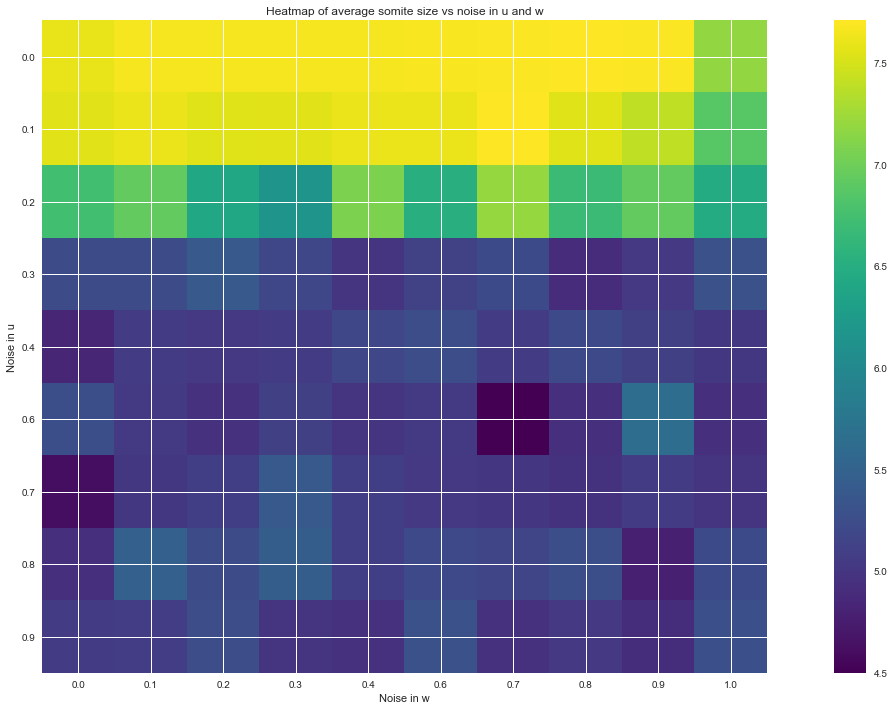

In [151]:
noise_w = np.around(noise_w, decimals=1)

noise_u = np.around(noise_u, decimals=1)
plt.figure(figsize=(24, 12))
plt.xticks(list(range(10)),noise_w)
plt.yticks(list(range(10)), noise_u)
plt.xlabel("Noise in w")
plt.ylabel("Noise in u")
plt.title("Heatmap of average somite size vs noise in u and w")
im = plt.imshow(mat, cmap="viridis")
plt.colorbar(im)
plt.savefig("colormap.png")

In [203]:
file = "/Users/ranjak/Desktop/zebrafish/dist"

In [211]:
matdist = np.zeros((10, 10))

In [222]:
with open(file, "r") as f:
    for lines in f:
        lines = lines.split(" ")
        try:
            ind1 = int(lines[0][2:-2])
            ind2 = int(lines[1][2:-2])
            dist = lines[2]
            if ("cauchy" in dist):
                matdist[ind1][ind2] = 1
            else:
                matdist[ind1][ind2] = 0.5
        except:
            pass
    

In [223]:
matdist1 = matdist[:-1][:]

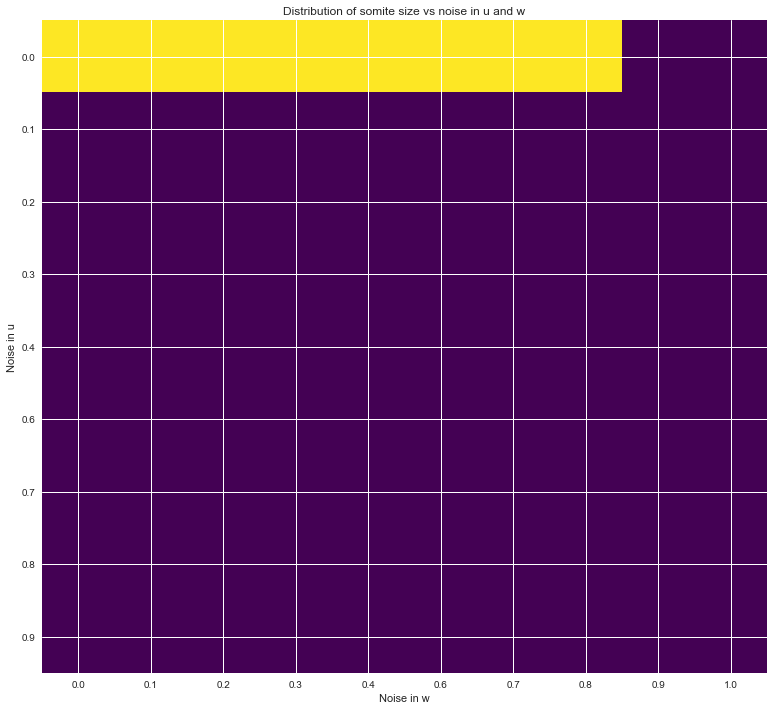

In [224]:
noise_w = np.around(noise_w, decimals=1)

noise_u = np.around(noise_u, decimals=1)
plt.figure(figsize=(24, 12))
plt.xticks(list(range(10)),noise_w)
plt.yticks(list(range(10)), noise_u)
plt.xlabel("Noise in w")
plt.ylabel("Noise in u")
plt.title("Distribution of somite size vs noise in u and w")
im = plt.imshow(matdist1, cmap="viridis")
plt.savefig("colormap.png")